# Read in Data and NLTK Basics

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [258]:
#Read in data
df = pd.read_csv(r"C:\Users\mridu\OneDrive\Desktop\Portfolio Projects\Sentiment Analysis\Reviews.csv")
print(df.shape)
df = df.head(500)
print(df.shape)



(568454, 10)
(500, 10)


In [259]:
df['Text'].values[0]
#df['review'].iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [260]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

## EDA

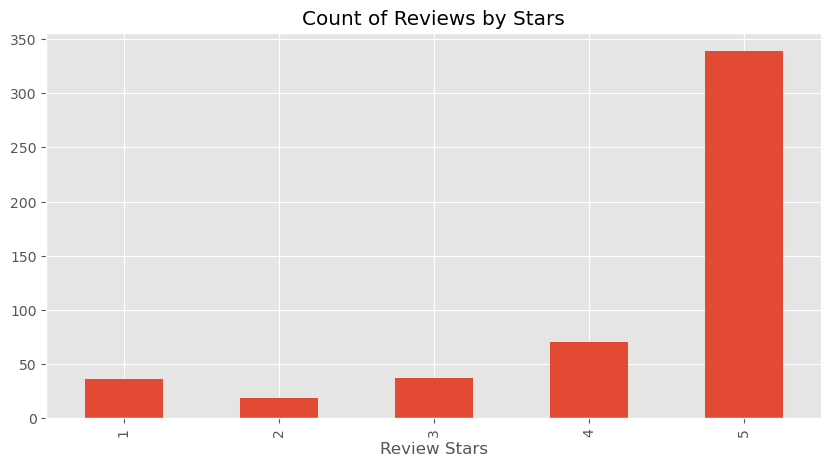

In [261]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [262]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [263]:
#nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [264]:
#nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [265]:
#nltk.download('words')
#nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [266]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mridu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [267]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [268]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [269]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [270]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [271]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [272]:
# Now we have sentiment score and metadata
vaders.head()

Id    neg    neu    pos  compound   ProductId          UserId  \
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

## Plot VADER results

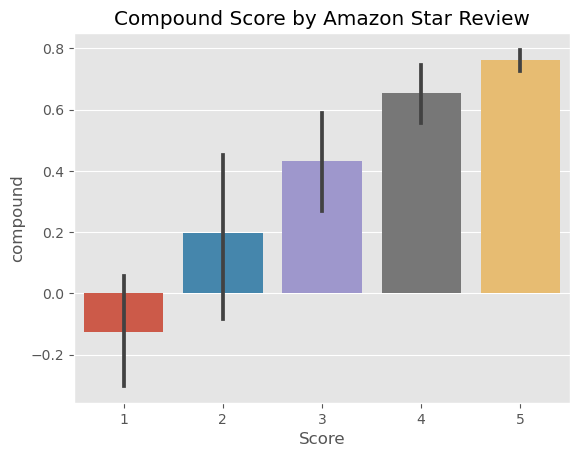

In [273]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

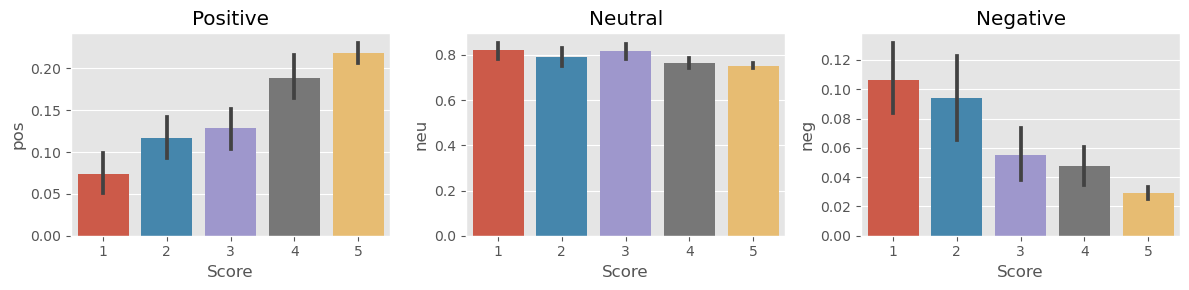

In [274]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [275]:
#!pip install torch
#!pip install transformers
#!pip install scipy
#!pip install spicy

In [276]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [277]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [278]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [279]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687459, 'roberta_pos': 0.0029573678}


In [280]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [281]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [284]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [285]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Combine and compare

C:\Users\mridu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


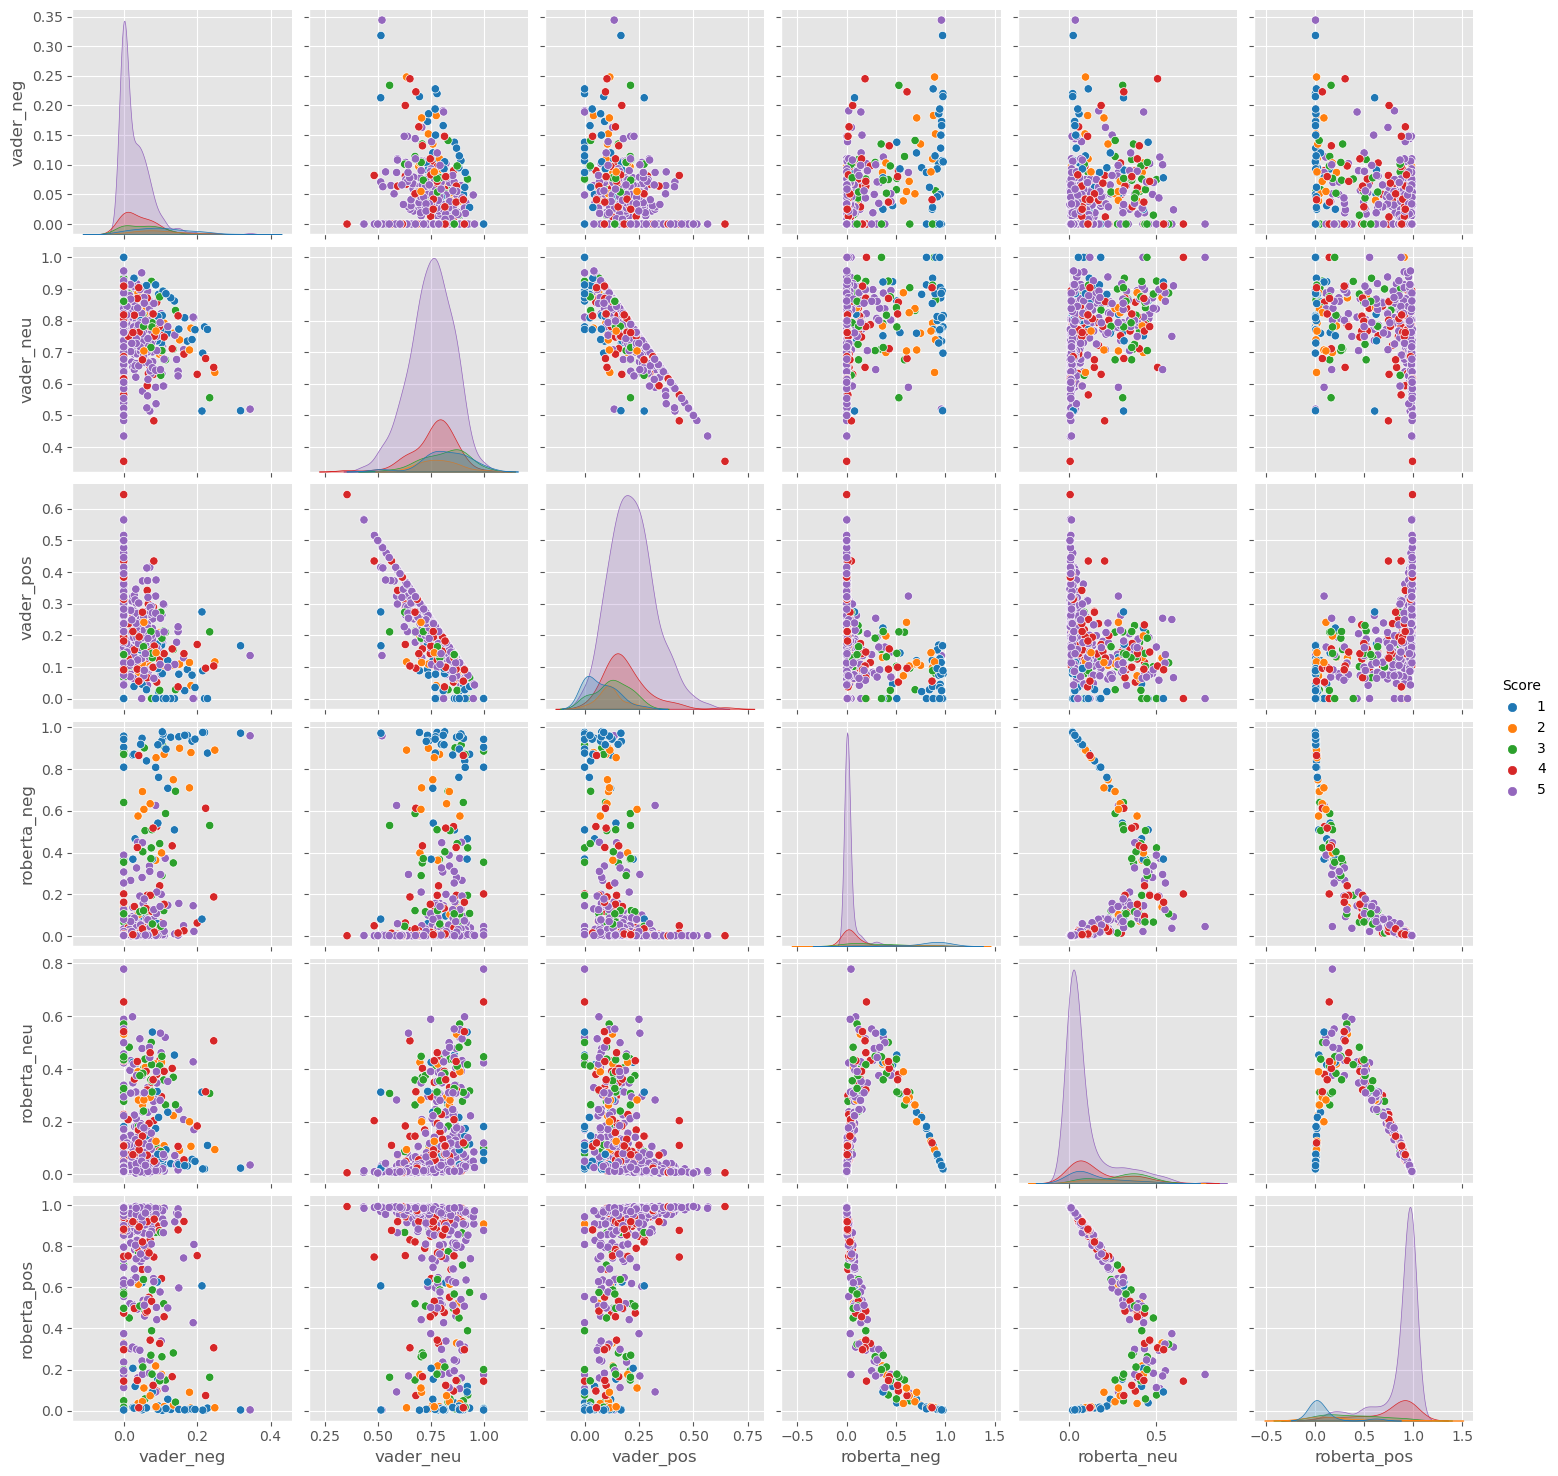

In [286]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Output Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [287]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [288]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [289]:
# nevative sentiment 5-Star view

In [290]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [291]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformers Pipeline

In [292]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [314]:
sent_pipeline('how are you today!')

[{'label': 'POSITIVE', 'score': 0.999394416809082}]

In [315]:
sent_pipeline('I am crying')

[{'label': 'NEGATIVE', 'score': 0.998386025428772}]

In [316]:
sent_pipeline('it was kind of okay')

[{'label': 'POSITIVE', 'score': 0.9997794032096863}]

# BERT Sentiment Analysis

## Install and Import Dependencies

In [43]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [296]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

## Instantiate Model

In [297]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## Encode and Calculate Sentiment

In [298]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')
tokens

tensor([[  101, 10197, 10140, 12050, 10502, 12296, 10598, 10662, 16197,   119,
         11838,   102]])

In [299]:
result = model(tokens)

In [300]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [ ]:
int(torch.argmax(result.logits))+1

## Collect Reviews

In [302]:
r = requests.get('https://www.yelp.com/biz/gordon-ramsay-hell-s-kitchen-mashantucket-2')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [303]:
reviews

['Everything was awesome.....the staff ,,( Alexis W. ,and the Executive Chef).....the risotto and braised short rib were amazing.     5 Stars!!',
 "14 out of 10.They made Asparagus taste good and I hate Asparagus .But seriously It's my new favorite Tuna Tartare,   My new Favorite Scallops,  our new Favorite Risotto.  (Me and my wife shared bites) The Gordon Ramsay Beef Wellington is World wide hyped  .... it lives up to said hype .   his famous Sticky Toffee Pudding.... Danielle Norcross loved it.   I had a Peanut butter and raspberry jelly chocolate tart...  I hate raspberries but they made that taste good for me the same kind of magic they pulled on the Asparagus.The Ambiance was gorgeous, classy and resembled the Hell's Kitchen on tv .  Alexis W. Was our server and she was an absolute treat to have wait on us .Pricey but worth it to go every once in a spectacular celebration... like Valentine's Day.",
 "Nothing seemed special here.  Yes, the beef wellington was cooked just right for

## Load Reviews into DataFrame and Score

In [304]:
import numpy as np
import pandas as pd

In [305]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [306]:
df['review'].iloc[0]

'Everything was awesome.....the staff ,,( Alexis W. ,and the Executive Chef).....the risotto and braised short rib were amazing.     5 Stars!!'

In [307]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [308]:
sentiment_score(df['review'].iloc[1])

5

In [309]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [310]:
df

review  sentiment
0  Everything was awesome.....the staff ,,( Alexi...          5
1  14 out of 10.They made Asparagus taste good an...          5
2  Nothing seemed special here.  Yes, the beef we...          2
3  Allow me to start by saying I am an avowed Gor...          2
4  Some restaurants are created to just feed you ...          4
5  First things first, make a reservation!  We ha...          5
6  A delicious affair. Service impeccable. Any qu...          4
7  Yup sorry, only 3 stars.This is the 4th Gordon...          3
8  Absolutely incredible to have a Gordon Ramsay ...          5
9  Came here tonight in a whim! Tried out two coc...          5

## Visualization

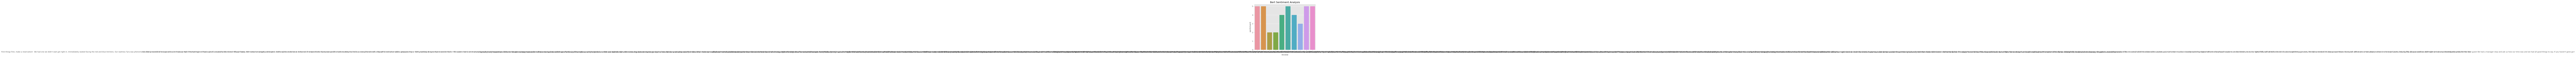

<Figure size 1000x800 with 0 Axes>

C:\Users\mridu\AppData\Local\Temp\ipykernel_35460\2050610325.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # This adjusts subplot params to give some padding.


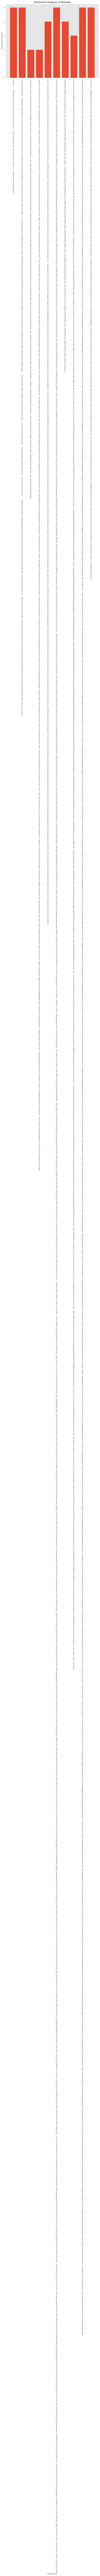

In [311]:
ax = sns.barplot(data=df, x='review', y='sentiment')
ax.set_title('Bert Sentiment Analysis')
plt.figure(figsize=(10, 8))
plt.show()

import matplotlib.pyplot as plt

# Set the size of your plot for better visibility
plt.figure(figsize=(10, 8))

# Create the bar chart
plt.bar(df['review'], df['sentiment'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title (optional but recommended for clarity)
plt.xlabel('Review ID')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Reviews')

# Show the plot
plt.tight_layout()  # This adjusts subplot params to give some padding.
plt.show()


In [327]:
print(df['review'].iloc[1])
print()
print("the Sentiment score for the above review is =",df['sentiment'].iloc[1])

14 out of 10.They made Asparagus taste good and I hate Asparagus .But seriously It's my new favorite Tuna Tartare,   My new Favorite Scallops,  our new Favorite Risotto.  (Me and my wife shared bites) The Gordon Ramsay Beef Wellington is World wide hyped  .... it lives up to said hype .   his famous Sticky Toffee Pudding.... Danielle Norcross loved it.   I had a Peanut butter and raspberry jelly chocolate tart...  I hate raspberries but they made that taste good for me the same kind of magic they pulled on the Asparagus.The Ambiance was gorgeous, classy and resembled the Hell's Kitchen on tv .  Alexis W. Was our server and she was an absolute treat to have wait on us .Pricey but worth it to go every once in a spectacular celebration... like Valentine's Day.

the Sentiment score for the above review is = 5


# Comparison Between VADER, ROBERTA AND BERT

In [222]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    res[text] = sia.polarity_scores(text)

  0%|          | 0/10 [00:00<?, ?it/s]

In [223]:
data = df
df = pd.DataFrame(data)

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    # Accessing the first column of the DataFrame where the review text is located
    text = row.iloc[0]  # Changed from row['review'] to row.iloc[0]
    res[text] = sia.polarity_scores(text)

# If you want to see the result
print(res)

  0%|          | 0/10 [00:00<?, ?it/s]

{'Everything was awesome.....the staff ,,( Alexis W. ,and the Executive Chef).....the risotto and braised short rib were amazing.     5 Stars!!': {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.658}, "14 out of 10.They made Asparagus taste good and I hate Asparagus .But seriously It's my new favorite Tuna Tartare,   My new Favorite Scallops,  our new Favorite Risotto.  (Me and my wife shared bites) The Gordon Ramsay Beef Wellington is World wide hyped  .... it lives up to said hype .   his famous Sticky Toffee Pudding.... Danielle Norcross loved it.   I had a Peanut butter and raspberry jelly chocolate tart...  I hate raspberries but they made that taste good for me the same kind of magic they pulled on the Asparagus.The Ambiance was gorgeous, classy and resembled the Hell's Kitchen on tv .  Alexis W. Was our server and she was an absolute treat to have wait on us .Pricey but worth it to go every once in a spectacular celebration... like Valentine's Day.": {'neg': 0.057, 'neu': 

## Calculating Vader for the scrapped Data

In [224]:
df_res = pd.DataFrame.from_dict(res, orient='index').reset_index()

# Rename the columns to reflect their contents
df_res.columns = ['review', 'neg', 'neu', 'pos', 'compound']
df_res.rename(columns={'neg': 'Vaders_neg', 'neu': 'Vaders_neu', 'pos': 'Vaders_pos'}, inplace=True)

# Display the resulting DataFrame
print(df_res)

                                              review  Vaders_neg  Vaders_neu  \
0  Everything was awesome.....the staff ,,( Alexi...       0.000       0.804   
1  14 out of 10.They made Asparagus taste good an...       0.057       0.674   
2  Nothing seemed special here.  Yes, the beef we...       0.096       0.807   
3  Allow me to start by saying I am an avowed Gor...       0.059       0.801   
4  Some restaurants are created to just feed you ...       0.007       0.754   
5  First things first, make a reservation!  We ha...       0.013       0.873   
6  A delicious affair. Service impeccable. Any qu...       0.000       0.741   
7  Yup sorry, only 3 stars.This is the 4th Gordon...       0.056       0.887   
8  Absolutely incredible to have a Gordon Ramsay ...       0.011       0.729   
9  Came here tonight in a whim! Tried out two coc...       0.000       0.676   

   Vaders_pos  compound  
0       0.196    0.6580  
1       0.269    0.9893  
2       0.097    0.0183  
3       0.140  

In [225]:
# Assuming df contains a column named 'sentiment' and df_res contains the sentiment scores along with 'review'
# Merge df_res with df to add the 'sentiment' column to df_res based on the 'review' column
merged_df = pd.merge(df_res, df[['review', 'sentiment']], on='review', how='left')

# Display the resulting merged DataFrame
print(merged_df)


                                              review  Vaders_neg  Vaders_neu  \
0  Everything was awesome.....the staff ,,( Alexi...       0.000       0.804   
1  14 out of 10.They made Asparagus taste good an...       0.057       0.674   
2  Nothing seemed special here.  Yes, the beef we...       0.096       0.807   
3  Allow me to start by saying I am an avowed Gor...       0.059       0.801   
4  Some restaurants are created to just feed you ...       0.007       0.754   
5  First things first, make a reservation!  We ha...       0.013       0.873   
6  A delicious affair. Service impeccable. Any qu...       0.000       0.741   
7  Yup sorry, only 3 stars.This is the 4th Gordon...       0.056       0.887   
8  Absolutely incredible to have a Gordon Ramsay ...       0.011       0.729   
9  Came here tonight in a whim! Tried out two coc...       0.000       0.676   

   Vaders_pos  compound  sentiment  
0       0.196    0.6580          5  
1       0.269    0.9893          5  
2       

## Plotting new Vader data

C:\Users\mridu\AppData\Local\Temp\ipykernel_35460\2453627174.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


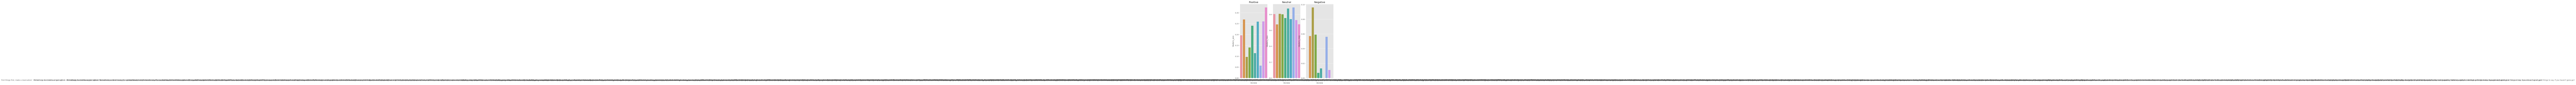

In [251]:
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
sns.barplot(data=merged_df, x='review', y='Vaders_pos', ax=axs[0])
sns.barplot(data=merged_df, x='review', y='Vaders_neu', ax=axs[1])
sns.barplot(data=merged_df, x='review', y='Vaders_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Calculating Roberta for the scrapped Data

In [234]:
def polarity_scores_roberta(example):
    try:
        encoded_text = tokenizer(example, return_tensors='pt', max_length=512, truncation=True)
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        return {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
    except Exception as e:
        print(f"Error processing text: {e}")
        # Return a default dictionary in case of error
        return {'roberta_neg': 0, 'roberta_neu': 0, 'roberta_pos': 0}


In [237]:
print(scores)

[0.97635514 0.02068746 0.00295737]


In [244]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Your provided polarity_scores_roberta function
def polarity_scores_roberta(merged_df):
    try:
        encoded_text = tokenizer(merged_df, return_tensors='pt', max_length=512, truncation=True)
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        return {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
    except Exception as e:
        print(f"Error processing text: {e}")
        # Return a default dictionary in case of error
        return {'roberta_neg': 0, 'roberta_neu': 0, 'roberta_pos': 0}

    return scores

def sentiment_score(review):
    # Ensure the review is truncated to the model's max input size
    tokens = tokenizer.encode(review, return_tensors='pt', truncation=True, max_length=512)
    result = model(tokens)
    return int(torch.argmax(result.logits))+1



# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Assuming merged_df is your DataFrame and it contains a column named 'review'
# Initialize an empty list to store combined results
combined_results = []

# Iterating through each row in merged_df to calculate sentiment scores from both models
for i, row in tqdm(merged_df.iterrows(), total=len(merged_df)):
    text = row['review']  # or row.iloc[0] if the column is unnamed
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    sentiment_score_result = sentiment_score(text)
    combined_result = {'sentiment_score_result': sentiment_score_result, **vader_result, **roberta_result, 'review': text}
    combined_results.append(combined_result)

# Convert the combined results into a DataFrame
results_df = pd.DataFrame(combined_results)

# Display the results DataFrame
print(results_df.head())

  0%|          | 0/10 [00:00<?, ?it/s]

   sentiment_score_result    neg    neu    pos  compound  roberta_neg  \
0                       5  0.000  0.804  0.196    0.6580     0.005851   
1                       5  0.057  0.674  0.269    0.9893     0.022652   
2                       2  0.096  0.807  0.097    0.0183     0.059320   
3                       2  0.059  0.801  0.140    0.9653     0.112031   
4                       5  0.007  0.754  0.240    0.9912     0.006561   

   roberta_neu  roberta_pos                                             review  
0     0.003405     0.005607  Everything was awesome.....the staff ,,( Alexi...  
1     0.045045     0.096186  14 out of 10.They made Asparagus taste good an...  
2     0.584729     0.341033  Nothing seemed special here.  Yes, the beef we...  
3     0.460648     0.335223  Allow me to start by saying I am an avowed Gor...  
4     0.020473     0.069967  Some restaurants are created to just feed you ...  


In [245]:
results_df.columns

Index(['sentiment_score_result', 'neg', 'neu', 'pos', 'compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'review'],
      dtype='object')

## Comparison Visualization

In [255]:
# Categorizing sentiment_score_result
results_df['custom_neg'] = results_df['sentiment_score_result'].apply(lambda x: 1 if x <= 2 else 0)
results_df['custom_neu'] = results_df['sentiment_score_result'].apply(lambda x: 1 if x == 3 else 0)
results_df['custom_pos'] = results_df['sentiment_score_result'].apply(lambda x: 1 if x >= 4 else 0)


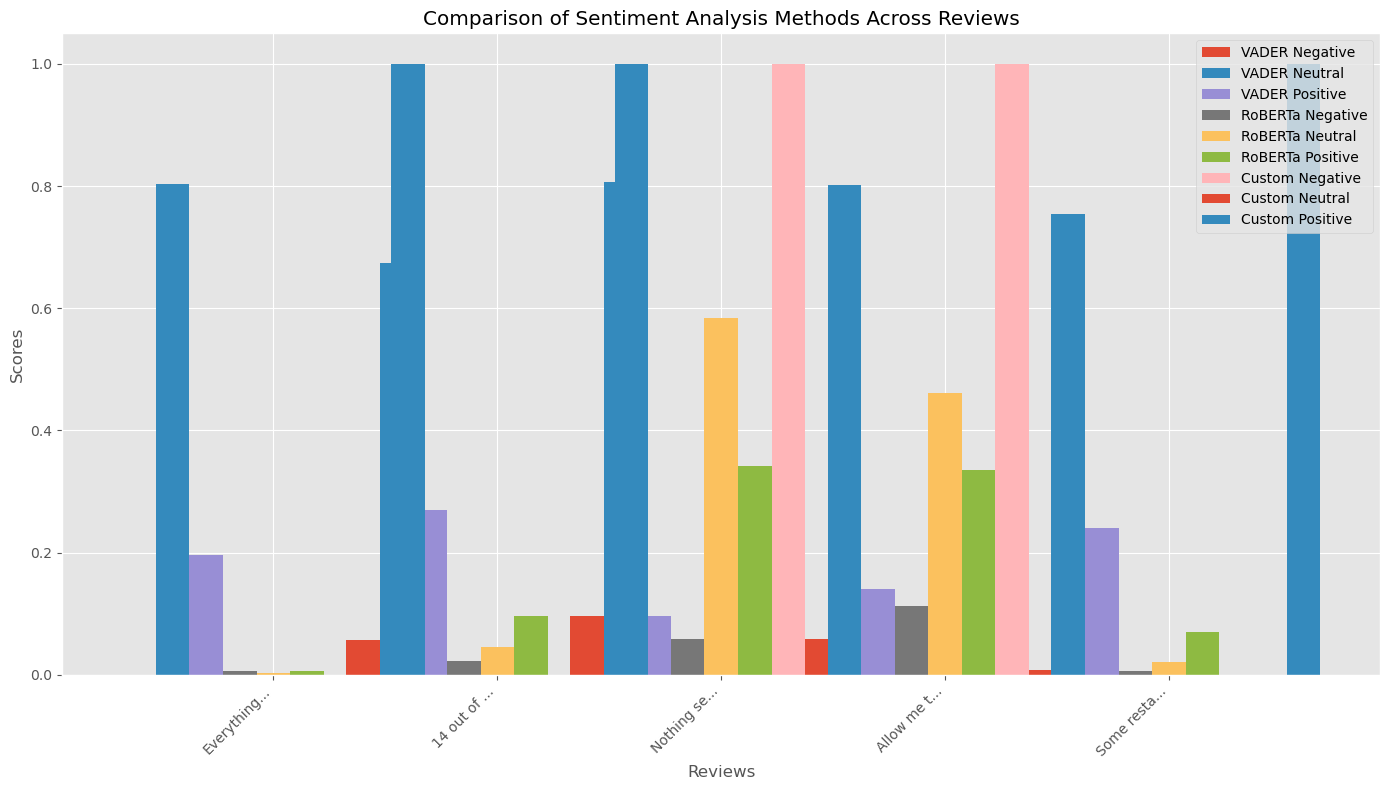

In [256]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data selection - let's select the first 5 reviews for simplicity
sample_df = results_df.head(5)

# Indices for plotting
indices = np.arange(len(sample_df))

# Width of the bars
bar_width = 0.15

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting for each model
ax.bar(indices, sample_df['neg'], bar_width, label='VADER Negative')
ax.bar(indices + bar_width, sample_df['neu'], bar_width, label='VADER Neutral')
ax.bar(indices + 2*bar_width, sample_df['pos'], bar_width, label='VADER Positive')

ax.bar(indices + 3*bar_width, sample_df['roberta_neg'], bar_width, label='RoBERTa Negative')
ax.bar(indices + 4*bar_width, sample_df['roberta_neu'], bar_width, label='RoBERTa Neutral')
ax.bar(indices + 5*bar_width, sample_df['roberta_pos'], bar_width, label='RoBERTa Positive')

ax.bar(indices + 6*bar_width, sample_df['custom_neg'], bar_width, label='Custom Negative')
ax.bar(indices + 7*bar_width, sample_df['custom_neu'], bar_width, label='Custom Neutral')
ax.bar(indices + 8*bar_width, sample_df['custom_pos'], bar_width, label='Custom Positive')

# Labels, title, and legend
ax.set_xlabel('Reviews')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Sentiment Analysis Methods Across Reviews')
ax.set_xticks(indices + 4*bar_width)
ax.set_xticklabels(sample_df['review'].apply(lambda x: x[:10] + '...'), rotation=45, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
